In [17]:
# %pip install pandas
# %pip install matplotlib]
# %pip install seaborn
# %pip install statsmodels

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose



   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   ------- -------------------------------- 1.8/9.6 MB 5.7 MB/s eta 0:00:02
   -------------- ------------------------- 3.4/9.6 MB 6.0 MB/s eta 0:00:02
   --------------------- ------------------ 5.2/9.6 MB 7.2 MB/s eta 0:00:01
   ------------------------------- -------- 7.6/9.6 MB 7.8 MB/s eta 0:00:01
   -------------------------------------- - 9.2/9.6 MB 8.2 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 7.4 MB/s  0:00:01
   ---------------------------------------- 0.0/37.1 MB ? eta -:--:--
   - -------------------------------------- 1.0/37.1 MB 5.7 MB/s eta 0:00:07
   ---- ----------------------------------- 4.2/37.1 MB 9.9 MB/s eta 0:00:04
   ----- ---------------------------------- 4.7

In [7]:
# Import an Excel file
df = pd.read_csv(r"C:\Users\vicky.shen\Downloads\daily_df.csv")

In [8]:
df.head()

,DATE,NUM_APPOINTMENTS,NUM_WALK_IN,NUM_CANCELLATION_BY_DONOR,NUM_DONATIONS,NUM_DEFERRALS,NUM_REJECTS,NUM_EXPIRES,NUM_ISSUES,NUM_PROSPECTS,INVENTORY
0,2016-01-01,10,1,0,5,2,4,0,72,267,1011
1,2016-01-02,321,36,47,182,20,1,0,65,223,968
2,2016-01-03,22,2,4,10,4,5,0,190,349,925
3,2016-01-04,450,32,61,256,31,0,0,340,395,572
4,2016-01-05,692,76,94,379,54,8,0,217,597,649


In [16]:
# import os
# os.getcwd()
# df = pd.read_csv("daily_df.csv")

'C:\\Users\\vicky.shen\\AppData\\Local\\Programs\\Microsoft VS Code'

In [18]:
# Z-Score Method
numeric_cols = ['NUM_APPOINTMENTS', 'NUM_WALK_IN', 'NUM_DONATIONS', 'NUM_ISSUES', 'INVENTORY']
z_scores = np.abs((df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std())

# Flag outliers where z-score > 3
outliers_z = df[z_scores > 3].dropna(how='all')
print("Z-Score Outliers:\n", outliers_z)


Z-Score Outliers:
      DATE  NUM_APPOINTMENTS  NUM_WALK_IN  NUM_CANCELLATION_BY_DONOR  \
242   NaT               NaN        113.0                        NaN   
362   NaT               NaN        114.0                        NaN   
431   NaT               NaN        118.0                        NaN   
536   NaT               NaN        121.0                        NaN   
538   NaT               NaN        129.0                        NaN   
539   NaT               NaN        113.0                        NaN   
544   NaT               NaN        118.0                        NaN   
545   NaT               NaN        132.0                        NaN   
664   NaT               NaN        113.0                        NaN   
790   NaT               NaN        117.0                        NaN   
956   NaT               NaN        117.0                        NaN   
957   NaT               NaN        130.0                        NaN   
958   NaT               NaN        123.0                  

IQR Outlier Counts:
 NUM_APPOINTMENTS    535
NUM_WALK_IN          11
NUM_DONATIONS       532
NUM_ISSUES            0
INVENTORY            33
dtype: int64


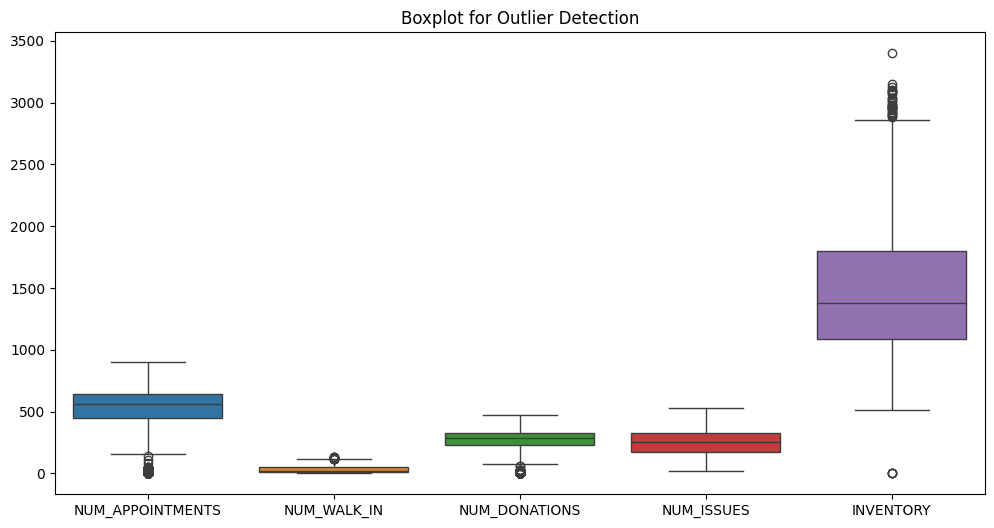

In [19]:


# IQR Method
outliers_iqr = pd.DataFrame()
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    mask = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))
    outliers_iqr[col] = mask

print("IQR Outlier Counts:\n", outliers_iqr.sum())


#  Visualize Outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplot for Outlier Detection")
plt.show()

# 4. Time Series Outlier Detection (Inventory)
from statsmodels.tsa.seasonal import STL

ts = df.set_index('DATE')['INVENTORY']
stl = STL(ts, period=7)
res = stl.fit()


In [9]:
# Convert DATE column to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

In [10]:
# Basic stats
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
                       DATE  NUM_APPOINTMENTS  NUM_WALK_IN  \
count                 3653       3653.000000  3653.000000   
mean   2020-12-31 00:00:00        495.178483    28.928826   
min    2016-01-01 00:00:00          0.000000     0.000000   
25%    2018-07-02 00:00:00        445.000000     9.000000   
50%    2020-12-31 00:00:00        560.000000    15.000000   
75%    2023-07-02 00:00:00        639.000000    52.000000   
max    2025-12-31 00:00:00        904.000000   132.000000   
std                    NaN        221.195700    28.002168   

       NUM_CANCELLATION_BY_DONOR  NUM_DONATIONS  NUM_DEFERRALS  NUM_REJECTS  \
count                3653.000000    3653.000000    3653.000000  3653.000000   
mean                  158.001916     254.274021      22.826718     6.232138   
min                     0.000000       0.000000       0.000000     0.000000   
25%                    92.000000     228.000000      16.000000     3.000000   
50%                   168.000000 

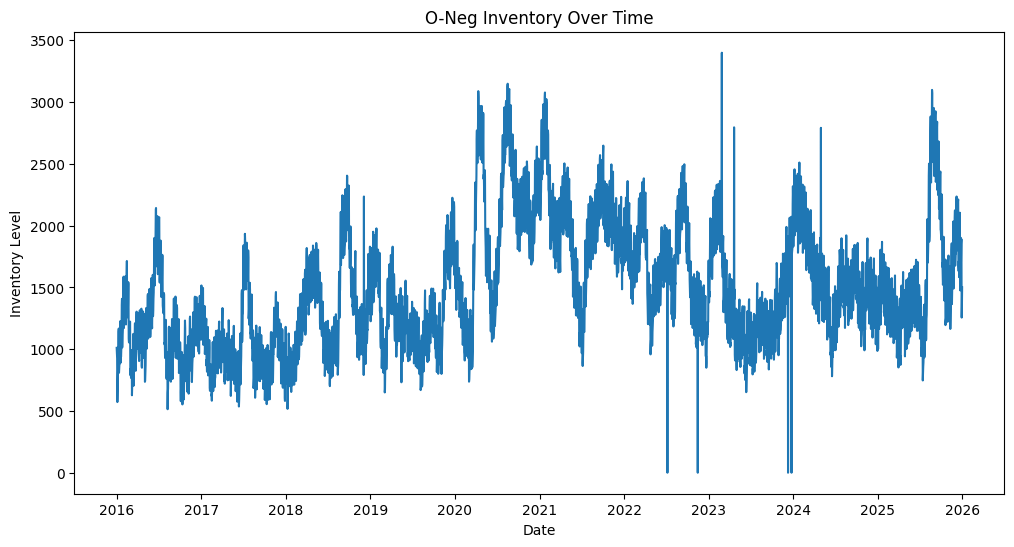

In [11]:
# Time Series Analysis
plt.figure(figsize=(12,6))
sns.lineplot(x='DATE', y='INVENTORY', data=df)
plt.title('O-Neg Inventory Over Time')
plt.xlabel('Date')
plt.ylabel('Inventory Level')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

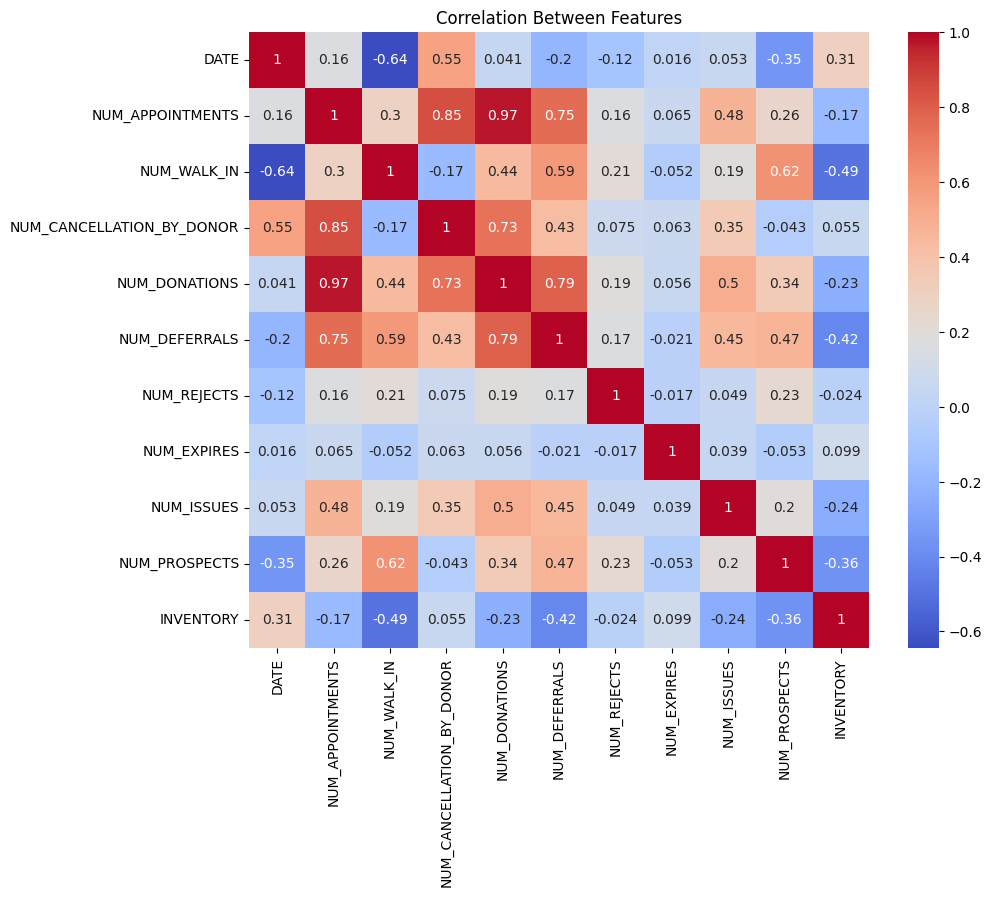

In [12]:
# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Features')
plt.show


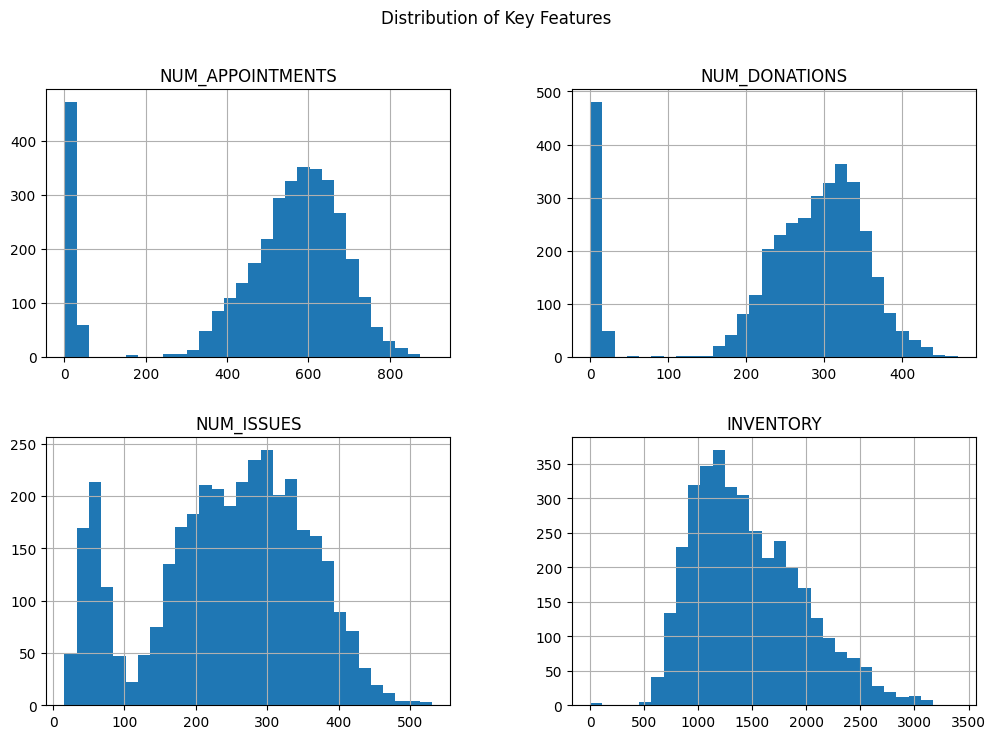

In [13]:
# Distribution of Key Columns
cols_to_plot = ['NUM_APPOINTMENTS', 'NUM_DONATIONS', 'NUM_ISSUES', 'INVENTORY']
df[cols_to_plot].hist(bins=30, figsize=(12,8))
plt.suptitle('Distribution of Key Features')
plt.show()


In [15]:

# Ratios
df['donation_success_rate'] = df['NUM_DONATIONS'] / df['NUM_APPOINTMENTS'].replace(0, np.nan)
df['cancellation_rate'] = df['NUM_CANCELLATION_BY_DONOR'] / df['NUM_APPOINTMENTS'].replace(0, np.nan)
df['issue_to_inventory_ratio'] = df['NUM_ISSUES'] / df['INVENTORY'].replace(0, np.nan)

# Rolling averages
df['inventory_7d_avg'] = df['INVENTORY'].rolling(window=7).mean()

print("\nFeature Engineering Completed. Sample:\n", df.head())




Feature Engineering Completed. Sample:
         DATE  NUM_APPOINTMENTS  NUM_WALK_IN  NUM_CANCELLATION_BY_DONOR  \
0 2016-01-01                10            1                          0   
1 2016-01-02               321           36                         47   
2 2016-01-03                22            2                          4   
3 2016-01-04               450           32                         61   
4 2016-01-05               692           76                         94   

   NUM_DONATIONS  NUM_DEFERRALS  NUM_REJECTS  NUM_EXPIRES  NUM_ISSUES  \
0              5              2            4            0          72   
1            182             20            1            0          65   
2             10              4            5            0         190   
3            256             31            0            0         340   
4            379             54            8            0         217   

   NUM_PROSPECTS  INVENTORY  donation_success_rate  cancellation_rate  \
0 

Note: you may need to restart the kernel to use updated packages.
Accuracy: 0.9493844049247606

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       695
           1       0.00      0.00      0.00        36

    accuracy                           0.95       731
   macro avg       0.48      0.50      0.49       731
weighted avg       0.90      0.95      0.93       731



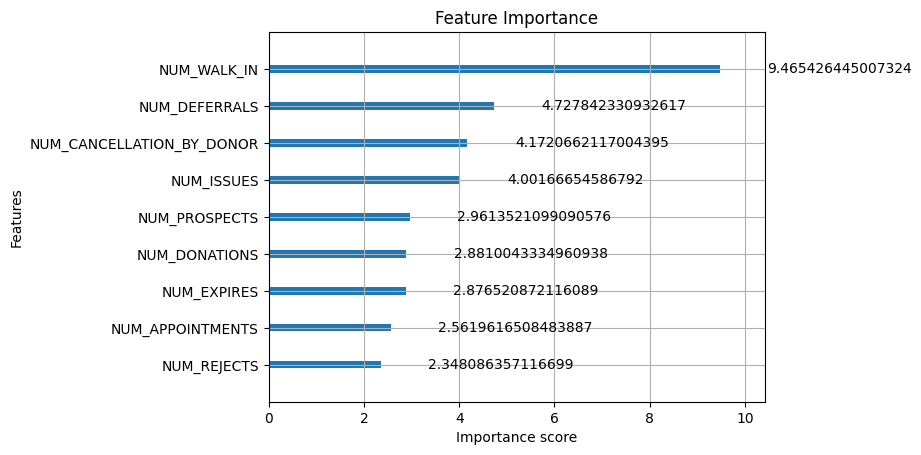

In [ ]:

# Install scikit-learn and xgboost if not installed
# %pip install --quiet scikit-learn xgboost

# sklearn and xgboost imports (pandas, numpy, matplotlib are imported in earlier cells)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb


# Example target: shortage risk (binary)
# Define threshold for shortage (e.g., inventory < 1000 units)
df['shortage_risk'] = (df['INVENTORY'] < 1000).astype(int)

# Features (drop DATE and INVENTORY if predicting shortage)
features = [
    'NUM_APPOINTMENTS', 
    'NUM_WALK_IN', 
    'NUM_CANCELLATION_BY_DONOR',
    'NUM_DONATIONS', 
    'NUM_DEFERRALS', 
    'NUM_REJECTS', 
    'NUM_EXPIRES',
    'NUM_ISSUES', 
    'NUM_PROSPECTS'
]

X = df[features]
y = df['shortage_risk']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train XGBoost Model
model = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)

# Evaluate Model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature Importance
import matplotlib.pyplot as plt  # safe to import here if needed for plotting
xgb.plot_importance(model, importance_type='gain', max_num_features=10)
plt.title("Feature Importance")
plt.show()
